double the length of text to test the model performance

In [2]:
import json
def read_file(path):
    res = []
    with open(path,'r',encoding='utf-8') as fin:
        for line in fin.readlines():
            res.append(json.loads(line.strip()))
    return res

In [3]:
import json
def read_file1(path):
    res = []
    with open(path,'r',encoding='utf-8') as f:
        return json.load(f)

In [26]:
dev = read_file("dev.json")
train = read_file("train.json")
submit = read_file("submit_test.json")

In [27]:
len(dev[9]['text'])

16550

In [28]:
def double_length(dataset):
    for data in dataset:
        data['text'] = data['text'] + data['text']
        
        

In [29]:
for i in [train,dev,submit]:
    double_length(i)


In [30]:
len(dev[9]['text'])

33100

In [31]:
length = []
for i in train:
    length.append(len(i['text']))

In [32]:
from scipy import stats
stats.describe(length)


DescribeResult(nobs=192, minmax=(2430, 86482), mean=9602.229166666666, variance=125391317.35034907, skewness=3.662435201718015, kurtosis=17.114553354533175)

In [34]:
def write_to_file(path,dataset):
    with open(path,"w",encoding='utf-8') as fout:
        for data in dataset:
            fout.write(json.dumps(data,ensure_ascii = False)+"\n")

write_to_file("../../Data/zofund/train_double.json",train)
write_to_file("../../Data/zofund/dev_double.json",dev)
write_to_file("../../Data/zofund/submit_test_double.json",submit)

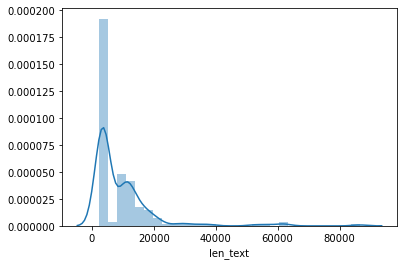

In [33]:

import pandas as pd
df = pd.DataFrame(length,columns=['len_text'])

import seaborn as sns

sns.distplot(df['len_text'])